In [93]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [69]:
data = pd.read_csv('660_dataset.csv')

In [70]:
data =data[['brand', 'name', 'exterior', 'trans', 'engine', 'moto_type',
       'zipcode', 'certified', 'year', 'mileage', 'photos', 'videos', 'doors',
       'price']]

In [71]:
data.head(5)

,brand,name,exterior,trans,engine,moto_type,zipcode,certified,year,mileage,photos,videos,doors,price
0,Nissan,Maxima,Others,Continuously Variable Automatic,6 Cylinder,sedan,2115,0,7,69406.0,39,1,4.0,11995.0
1,BMW,335i,Black,8 Speed Automatic,6 Cylinder Turbo,sedan,2115,0,3,25755.0,44,1,4.0,29995.0
2,BMW,528i,Others,8 Speed Shiftable Automatic,4 Cylinder Turbo,sedan,2115,0,3,13751.0,50,1,4.0,29995.0
3,INFINITI,Q50,White,7 Speed Shiftable Automatic,6 Cylinder,sedan,2115,1,2,13251.0,26,1,4.0,32990.0
4,Audi,A6,Silver,8 Speed Shiftable Automatic,6 Cylinder Supercharg,sedan,2115,0,3,27593.0,57,1,4.0,33995.0


In [72]:
print(data[data['price']>=100000].shape)
print(data[data['price']<100000].shape)
print(data.brand.value_counts().shape)

(1442, 14)
(164145, 14)
(58,)


In [73]:
#drop cars which price over 100,000
data = data[data.price < 100000]

In [74]:
price_min=min(data['price'])
price_max=max(data['price'])


In [75]:
#data.price = data.price.map(lambda x: (x - price_min) / (price_max - price_min))

In [76]:
data.price.head(5)

0    11995.0
1    29995.0
2    29995.0
3    32990.0
4    33995.0
Name: price, dtype: float64

In [77]:
mileage_min=min(data.mileage)
mileage_max=max(data.mileage)

In [78]:
data.mileage = data.mileage.map(lambda x: (x-mileage_min)/(mileage_max -mileage_min))

In [79]:
data.head(5)

,brand,name,exterior,trans,engine,moto_type,zipcode,certified,year,mileage,photos,videos,doors,price
0,Nissan,Maxima,Others,Continuously Variable Automatic,6 Cylinder,sedan,2115,0,7,0.078780,39,1,4.0,11995.0
1,BMW,335i,Black,8 Speed Automatic,6 Cylinder Turbo,sedan,2115,0,3,0.029233,44,1,4.0,29995.0
2,BMW,528i,Others,8 Speed Shiftable Automatic,4 Cylinder Turbo,sedan,2115,0,3,0.015607,50,1,4.0,29995.0
3,INFINITI,Q50,White,7 Speed Shiftable Automatic,6 Cylinder,sedan,2115,1,2,0.015040,26,1,4.0,32990.0
4,Audi,A6,Silver,8 Speed Shiftable Automatic,6 Cylinder Supercharg,sedan,2115,0,3,0.031319,57,1,4.0,33995.0


In [80]:
data.brand.value_counts().shape
#did no harm to brand

(57,)

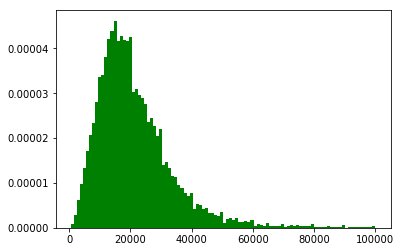

In [81]:
n, bins, patches = plt.hist(data.price.values, 100, normed=1, facecolor='green')
plt.grid(False)
plt.show()

In [82]:
# we can see from the plot, most of the cars are around 20000

In [83]:
#then we deal with catagorical data by using LabelEncode

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [85]:
y=data.price
X=data.drop(['price'], axis = 1)

In [86]:
for i in range(7):
    column = X.iloc[:,i:i+1].values
    le.fit(column)
    X.iloc[:,i:i+1] = le.transform(column) 

X.head()
#turn catagorical into numerical

C:\Users\10\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\10\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,brand,name,exterior,trans,engine,moto_type,zipcode,certified,year,mileage,photos,videos,doors
0,39,481,14,24,9,3,0,0,7,0.078780,39,1,4.0
1,4,44,1,20,11,3,0,0,3,0.029233,44,1,4.0
2,4,68,14,21,6,3,0,0,3,0.015607,50,1,4.0
3,23,534,18,19,9,3,0,1,2,0.015040,26,1,4.0
4,3,118,16,21,10,3,0,0,3,0.031319,57,1,4.0


In [66]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

OneHotColumns = X[['brand', 'exterior', 'trans', 'engine', 'moto_type', 'zipcode']].values
OtherColumns = X[['name', 'certified', 'year', 'mileage', 'photos', 'videos', 'doors']].values
enc.fit(OneHotColumns)
#enc.n_values_
#enc.feature_indices_

X = np.concatenate((OtherColumns, enc.transform(OneHotColumns).toarray()),axis=1)
print(X.shape,y.shape)

(164145, 188) (164145,)


In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=233)


Linear Models

In [94]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#_pred = y_pred*(price_max-price_min)+price_min

print('mse=', mean_squared_error(y_test, y_pred))
print(y_pred)

mse= 87679571.8099
[ 29179.9459956   20642.33219037  17360.6466864  ...,  -9924.18565954
   3918.56731301  26937.69586108]


In [95]:
# tree
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('mse=', mean_squared_error(y_test, y_pred))
print(y_pred)

mse= 20746731.949
[ 32434.  15888.  14995. ...,   3500.   7290.  28489.]


In [ ]:
#svm
'''
from sklearn.svm import SVR

clf = SVR()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('mse=', mean_squared_error(y_test, y_pred))
print(y_pred*(price_max-price_min)+price_min)
'''

In [100]:
#knn
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(weights = 'distance')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('mse=', mean_squared_error(y_test, y_pred))
print(y_pred)

mse= 37653078.1507
[ 25549.59215286  13006.39424245  17651.94656882 ...,   6287.81718539
   6091.66427223  20857.57093114]


In [98]:
#mlp
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('mse=', mean_squared_error(y_test, y_pred))

mse= 76328211.6494


C:\Users\10\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [99]:
#randomforest
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state = 666)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('mse=', mean_squared_error(y_test, y_pred))

mse= 12442466.2092


## Gradient boosting

In [102]:
from sklearn.utils import shuffle

In [103]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('mse=', mean_squared_error(y_test, y_pred))



mse= 33866799.3761


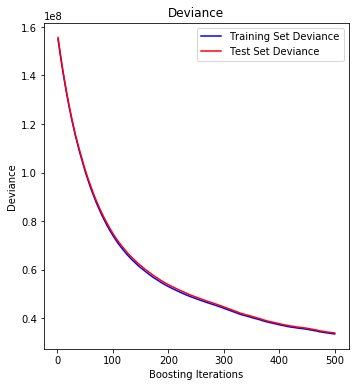

In [104]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

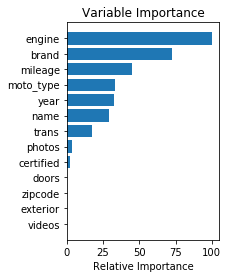

In [109]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()